In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df=pd.read_csv("../data/Autos/autos.csv.bz2", encoding="iso-8859-1")

df=df[df["offerType"]=="Angebot"]
df=df[df["vehicleType"]=="kleinwagen"]
df=df[df["notRepairedDamage"]=="nein"]

df.dropna(inplace=True)

df.head()

X=df[["yearOfRegistration","kilometer"]]
y=df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)

<AxesSubplot:xlabel='kilometer', ylabel='Density'>

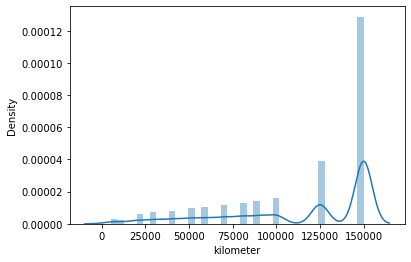

In [7]:
sns.distplot(df["kilometer"])


In [2]:
print(X_test.shape)

(12881, 2)


In [3]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
print(model.score(X_train, y_train))

0.5443622949348134


In [4]:
print(model.score(X_test, y_test))

0.5452083061543552


## One-Hot Encoding

In [11]:
df=pd.read_csv("../data/Autos/autos.csv.bz2", encoding="iso-8859-1")

df=df[df["offerType"]=="Angebot"]
df=df[df["vehicleType"]=="kleinwagen"]
df=df[df["notRepairedDamage"]=="nein"]

df.dropna(inplace=True)

##non numeric values need to be turned into true/false bzw. 0/1

In [12]:
df["gearbox"].unique()

array(['manuell', 'automatik'], dtype=object)

In [13]:
df["gearbox_automatik"]=df["gearbox"]=='automatik'

In [14]:
df["gearbox_automatik"]

3         False
4         False
17         True
23        False
29        False
          ...  
371472    False
371478    False
371499    False
371503    False
371516    False
Name: gearbox_automatik, Length: 51521, dtype: bool

In [17]:


X=df[["yearOfRegistration","kilometer","gearbox_automatik"]]
y=df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)
model= LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.5394764570359314
0.5671509491727555


In [18]:
df["brand"].unique()

array(['volkswagen', 'skoda', 'renault', 'seat', 'fiat', 'ford', 'nissan',
       'audi', 'mercedes_benz', 'honda', 'peugeot', 'opel', 'smart',
       'kia', 'daihatsu', 'citroen', 'hyundai', 'mini', 'mitsubishi',
       'suzuki', 'bmw', 'lancia', 'daewoo', 'toyota', 'mazda',
       'chevrolet', 'dacia', 'alfa_romeo', 'subaru', 'trabant', 'rover',
       'chrysler', 'lada', 'volvo'], dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder

X=np.array([['volkswagen'],['skoda'],['skoda'],['volkswagen']])

oh=OneHotEncoder()
oh.fit(X)

print(oh.categories_) #welche categorien hat es erkannt
print(oh.transform(X)) #sparse matrix
print(oh.transform(X).toarray()) #brauch mehr speicher 

[array(['skoda', 'volkswagen'], dtype='<U10')]
  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [ ]:
#Wir möchten den hot encoder nicht für alle spalten verwenden sondern nur auf die gewählten 

In [25]:
from sklearn.compose import ColumnTransformer
X=df[["kilometer","yearOfRegistration","brand"]]
cf=ColumnTransformer([("brand",OneHotEncoder(),["brand"])],remainder="passthrough")  
#"brand" ist nur eine eigene Benenung
#reminder="passthrough" sagt dass die nicht umgewandelten spalter weiter gereicht werden

cf.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('brand', OneHotEncoder(), ['brand'])])

In [26]:
print(cf.transform(X).toarray().shape)

(51521, 36)


In [27]:
X_transformed=cf.transform(X)

In [28]:

y=df["price"]

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, train_size=0.75)



model= LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6555752517871475
0.6839016728822918


In [30]:
cf.named_transformers_["brand"].categories_    #### categories of OHE

[array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
        'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
        'kia', 'lada', 'lancia', 'mazda', 'mercedes_benz', 'mini',
        'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'rover',
        'seat', 'skoda', 'smart', 'subaru', 'suzuki', 'toyota', 'trabant',
        'volkswagen', 'volvo'], dtype=object)]

In [31]:
### Wir möchten jetzt Werte für ein Auto schätzen



In [37]:
X_pred=pd.DataFrame([[150000,2000,"audi"]],columns=["kilometer","yearOfRegistration","brand"])

# es ist wichtig vorher die Columnen zu benennen!!

## Die daten müssen zuerst durch den Column Transform durchlaufen!!!

In [38]:
model.predict(cf.transform(X_pred))

array([5886.56175869])

In [39]:
df.groupby("brand").agg(c=("brand",len))

,c
brand,
alfa_romeo,158
audi,1100
bmw,240
chevrolet,423
chrysler,5
citroen,1115
dacia,196
daewoo,160
daihatsu,330


In [ ]:
##df=df[(df["brand"]=="audi")|(df["brand"]=="bmw")|(df["brand"]=="skoda") <--- if we want to consider only some types

In [41]:
df=pd.read_csv("../data/Autos/autos.csv.bz2", encoding="iso-8859-1")

df_grouped=df.groupby("vehicleType").agg(avgP=("price",np.mean))
df_grouped.head()

,avgP
vehicleType,
andere,677328.957700
bus,10302.742956
cabrio,15066.444013
coupe,25961.682040
kleinwagen,5694.229134


<AxesSubplot:xlabel='vehicleType', ylabel='avgP'>

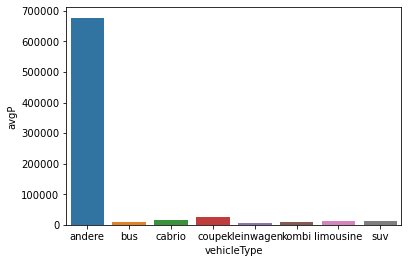

In [42]:
sns.barplot(x=df_grouped.index, y=df_grouped["avgP"])

In [43]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,NaN,-0.001652
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358,NaN,0.027113
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,NaN,-0.026694
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000,NaN,0.014963
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001652,0.027113,-0.026694,0.014963,NaN,1.000000


In [44]:
df.corr()["price"].abs()

price                  1.000000
yearOfRegistration     0.000182
powerPS                0.006850
kilometer              0.000635
monthOfRegistration    0.002826
nrOfPictures                NaN
postalCode             0.003164
Name: price, dtype: float64